Clustering a real-world data using Kmeans: In the provided wine dataset, perform Kmeans clustering. Perform multiple Kmeans by selecting different value for cluster- size ‘K’ and evaluate them using silhouette coefficient to select the best value of K for given data set. Next, perform feature scaling of the data assuming normal distribution and perform multiple Kmeans again to select the best value for ‘K’ as before. Compare the results. 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

In [7]:
data=pd.read_csv('wine-clustering.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [12]:
k_values = range(2, 11)

silhouette_scores_unscaled = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=48)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores_unscaled.append(silhouette_avg)
    print(f"K={k}, Silhouette Score : {silhouette_avg}")

K=2, Silhouette Score : 0.6568536504294317
K=3, Silhouette Score : 0.5595823478987215
K=4, Silhouette Score : 0.5613289817418605
K=5, Silhouette Score : 0.5615230798092506
K=6, Silhouette Score : 0.5088538547336847
K=7, Silhouette Score : 0.5574646654973113
K=8, Silhouette Score : 0.5288559452839453
K=9, Silhouette Score : 0.5254915139292258
K=10, Silhouette Score : 0.5363170619469348


In [17]:
best_k_unscaled = k_values[silhouette_scores_unscaled.index(max(silhouette_scores_unscaled))]
print(f"Best K (Unscaled): {best_k_unscaled}")

Best K (Unscaled): 2


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

silhouette_scores_scaled = []
for k in k_values:
    kmeans_scaled = KMeans(n_clusters=k, random_state=48)
    labels_scaled = kmeans_scaled.fit_predict(data_scaled)
    silhouette_avg_scaled = silhouette_score(data_scaled, labels_scaled)
    silhouette_scores_scaled.append(silhouette_avg_scaled)
    print(f"K={k}, Silhouette Score (Scaled): {silhouette_avg_scaled}")

K=2, Silhouette Score (Scaled): 0.2596521860778704
K=3, Silhouette Score (Scaled): 0.2848589191898987
K=4, Silhouette Score (Scaled): 0.24519129323772165
K=5, Silhouette Score (Scaled): 0.17426093977435667
K=6, Silhouette Score (Scaled): 0.16277705862134456
K=7, Silhouette Score (Scaled): 0.16665157787453078
K=8, Silhouette Score (Scaled): 0.13272784312106078
K=9, Silhouette Score (Scaled): 0.1281543901330246
K=10, Silhouette Score (Scaled): 0.1333529934806151


In [20]:
best_k_scaled = k_values[silhouette_scores_scaled.index(max(silhouette_scores_scaled))]
print(f"Best K (Scaled): {best_k_scaled}")

Best K (Scaled): 3


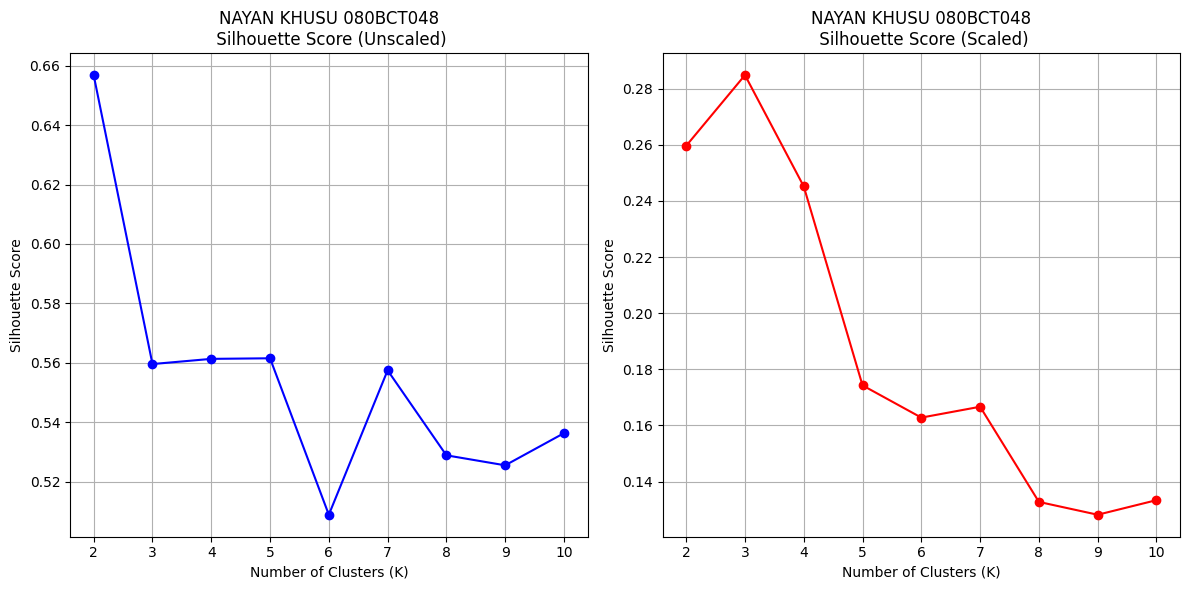

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_unscaled, marker='o', linestyle='-', color='b')
plt.title('NAYAN KHUSU 080BCT048\n Silhouette Score (Unscaled)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_scaled, marker='o', linestyle='-', color='r')
plt.title('NAYAN KHUSU 080BCT048\n Silhouette Score (Scaled)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
results_df = pd.DataFrame({
    'K': k_values,
    'Silhouette Score (Unscaled)': silhouette_scores_unscaled,
    'Silhouette Score (Scaled)': silhouette_scores_scaled
})
print(results_df)

    K  Silhouette Score (Unscaled)  Silhouette Score (Scaled)
0   2                     0.656854                   0.259652
1   3                     0.559582                   0.284859
2   4                     0.561329                   0.245191
3   5                     0.561523                   0.174261
4   6                     0.508854                   0.162777
5   7                     0.557465                   0.166652
6   8                     0.528856                   0.132728
7   9                     0.525492                   0.128154
8  10                     0.536317                   0.133353



Evaluating binary classifier model: Refer back to your logistic regression assignment; questions number 6 and 7. First split synthetic data generated (question 6) into train and test set (70-30). Then fit a logistic regression to the training data and evaluate the model on the train set using the metrics: accuracy, F1score and then using ROC curve and AUC.

In [29]:
def GRE_fun(x):
    if x > 310:
        return 0
    else:
        return 1
GRE = np.random.randint(260, 340, 200).astype(int)
result = np.array([GRE_fun(i) for i in GRE])
i = np.random.choice(range(len(GRE)), 20, replace=False)
result[i] = 1 - result[i]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(GRE.reshape(-1, 1), result, test_size=0.3, random_state=48)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_train_pred = model.predict(X_train)

In [34]:
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [36]:
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test F1 Score: {f1:.2f}")

Test Accuracy: 0.78
Test F1 Score: 0.85


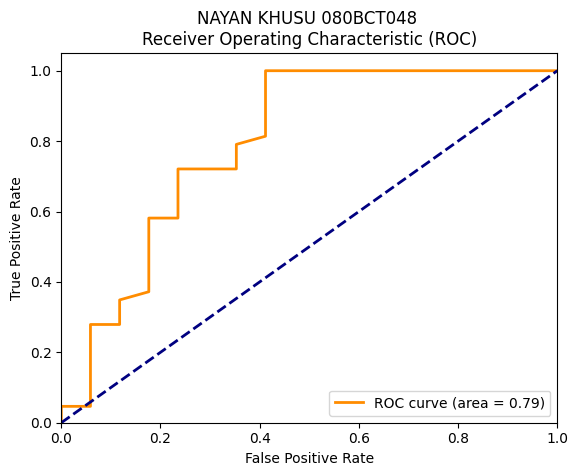

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NAYAN KHUSU 080BCT048 \nReceiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()